## Image Manipulation in Python
We show how to read images into 2d arrays of pixels.
where each pixel is a list [r,g,b] and r,g,b are in range(0,256)
We then manipulate those images and save the results back in a file.

First we just read an image into an array and look at one pixel.

[101  39  24]
(3024, 4032, 3)
uint8


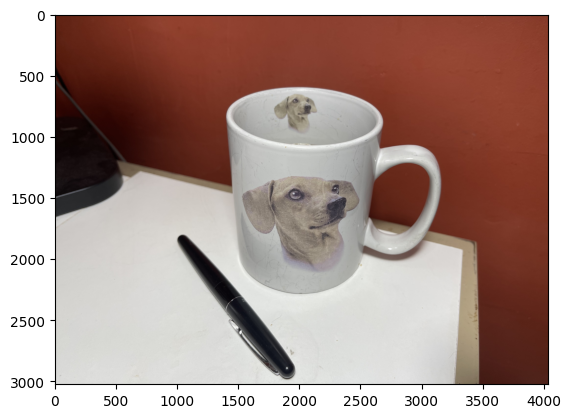

In [1]:
from matplotlib import pyplot
from matplotlib import image
import numpy as np

image2 = image.imread('images/coffee_cup.jpg')

img = np.asarray(image2)
print(img[100][100])
print(img.shape)
print(img.dtype)
pyplot.imshow(image2)





# shrinking an image
Next we look at how to shrink an image (as these images can have millions of points).
We use the notation
``` puython
img[::10,::10,::]
```
where ```lo:hi:step``` is the usual range notation for a slice starting at lo, going up to but not including hi, with the given step size.
If the lo is omitted, then it defaults to the beginning of the list (i.e. 0) and if hi is omitted it defaults to the length of the list,
so ```::10``` takes every 10th element in the list.

Also ```img[a,b,c]``` is the numpy way of representing ```img[a][b][c]```


size of img is (3024, 4032, 3)
size of img2 is (303, 404, 3)
(303, 404, 3)


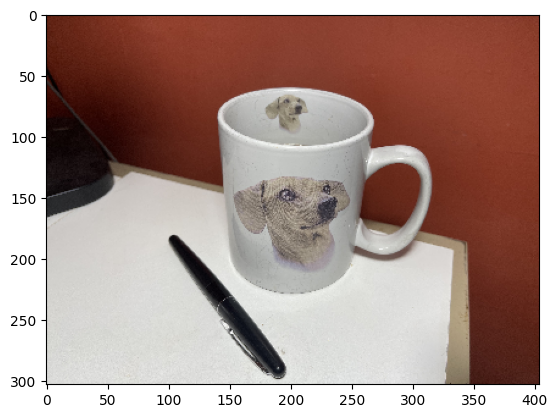

In [2]:
dims = img.shape
print('size of img is',dims)


img2 = img[::10,::10,::]  # take every 10th pixel vertically and horizontally
dims2 =img2.shape
print('size of img2 is',dims2)

pyplot.imshow(img2)
pyplot.imsave('coffee.jpg',img2)
print(img2.shape)


(3024, 4032, 3)
(3024, 4032, 3)
10 10
(303, 404, 3)


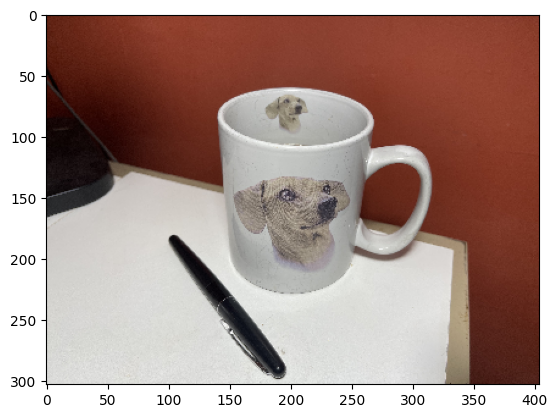

In [3]:
def shrink(img,k):
    ''' shrinl the image to make it k times smaller 
        k must be an integer >=1
    '''
    (w1,h1,p1) = img.shape
    print(img.shape)
    dw = dh = k
    print(dw,dh)
    return img[::dw,::dh,::]
print(img.shape)
img0 = shrink(img,10)
print(img0.shape)
pyplot.imshow(img0)

# More slicing
Let's shrink the coffee cup image to 100x100

(100, 100, 3)


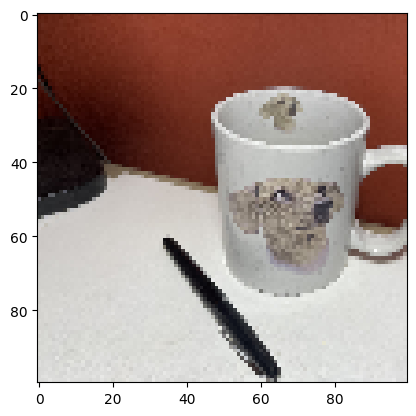

In [4]:
img3 = img[::30,::30,::]
img3 = img3[:100:,:100:,::]
pyplot.imshow(img3)
print(img3.shape)

# Looking at the pixels
We can downsize even further to a 5x5 array of pixels to see how images are stored.

(5, 5, 3)


array([[[ 88,  28,  17],
        [132,  57,  38],
        [148,  67,  48],
        [140,  64,  48],
        [139,  63,  47]],

       [[ 71,  21,  12],
        [ 85,  28,  17],
        [128,  56,  41],
        [123,  59,  47],
        [124,  55,  39]],

       [[ 21,  12,  13],
        [ 42,   8,   6],
        [ 96,  40,  27],
        [200, 202, 199],
        [171, 173, 172]],

       [[204, 200, 197],
        [212, 209, 204],
        [219, 216, 211],
        [194, 196, 193],
        [168, 168, 166]],

       [[211, 210, 206],
        [222, 221, 217],
        [220, 221, 216],
        [228, 230, 227],
        [219, 220, 215]]], dtype=uint8)

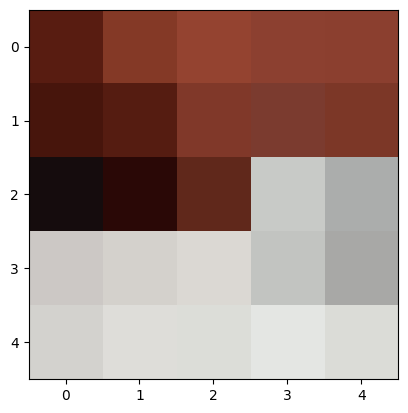

In [5]:
img4 = img3[::20,::20,::] # shrink the 100x100 image to a 5x5 by taking every 20th pixel
pyplot.imshow(img4)
print(img4.shape)
img4

# Zooming in
We can also zoom into a section of an image by looking only at those pixels near some point in the image

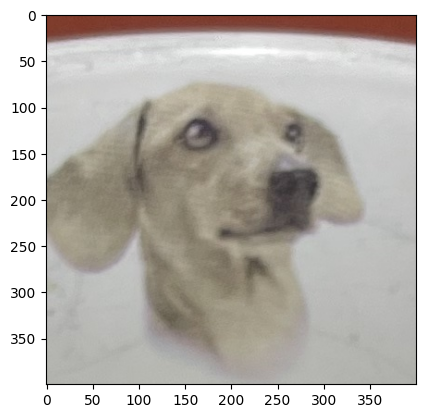

In [14]:
dp = 200
x = 780
y = 2000
img4a = img[x-dp:x+dp,y-dp:y+dp,:]
pyplot.imshow(img4a)

# Saving an image
Once we've created a new 2d array of pixels, we can save it as an image with pyplot.imsave(filename, array)

In [15]:
pyplot.imsave('coffee.jpg',img2)
pyplot.imsave('coffee.png',img2)
pyplot.imsave('coffee100.png',img3)
pyplot.imsave('coffee5.png',img4)


# Filters
Next we show how to manipulate images by performing operations on the individual pixels.
We start by converting an image to grayscale. The idea is to replace ever [r,g,b] pixel
with [m,m,m] where m = (r+g+b)/3.  We have to be a little careful though and convert the r,g,b
values to integers before averaging as they are unsigned 8bit ints!

In [16]:
def grayscale(img):
    img2 = img.copy()
    print('copied')
    for i in range(len(img2)):
        if i%100==0:
            print(i,end=" ")
        for j in range(len(img2[0])):
            x = img2[i][j]
            m = (int(x[0]) + int(x[1]) + int(x[2]))//3
            x[0]=m
            x[1]=m
            x[2]=m
    print('modified')
    return img2


copied
0 100 200 300 modified


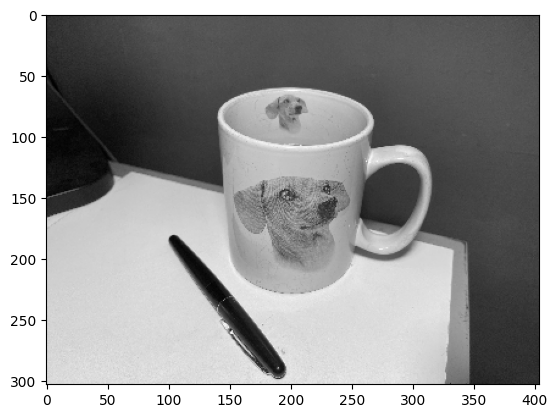

In [17]:
gray_img2 = grayscale(img2)
pyplot.imshow(gray_img2)
pyplot.show()

# numpy arrays
We show how to create and index a numpy array

In [57]:
z = np.ndarray((2,4,3),np.ubyte)
z

array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]], dtype=uint8)

In [65]:
for i in range(2):
    for j in range(4):
        for k in range(3):
            z[i,j,k]=100*i+10*j + k
z

array([[[  0,   1,   2],
        [ 10,  11,  12],
        [ 20,  21,  22],
        [ 30,  31,  32]],

       [[100, 101, 102],
        [110, 111, 112],
        [120, 121, 122],
        [130, 131, 132]]], dtype=uint8)

In [75]:
z[1,2,1]

121

In [72]:
z[1]

array([[100, 101, 102],
       [110, 111, 112],
       [120, 121, 122],
       [130, 131, 132]], dtype=uint8)

In [76]:
z[1][2]

array([120, 121, 122], dtype=uint8)

In [79]:
z[1][2][1]

121

# Python lists are different from numpy arrays
Python lists can contain a variety of different element types (ints, floats, strings, lists, etc.)
Numpy arrays can only hold one type of value.

Python lists can only be indexed with integers or slices, e.g. x[5]  or x[5:7]

Numpy list can be indexed with tuples, e.g.  ```z[1,2]``` which is equivalent to ```z[1][2]``` in Python

In [80]:
x = [[[1,2],[3,4]], [[5,6],[7,8]]]
x

[[[1, 2], [3, 4]], [[5, 6], [7, 8]]]

In [81]:
x[1]

[[5, 6], [7, 8]]

In [83]:
x[1,1]

TypeError: list indices must be integers or slices, not tuple